<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Applied-Modeling/blob/master/Final_Submission_of_Bhav_sprint_challenge_Dec13__Applied%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [3]:
train.head(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0


In [4]:
test.head(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0


In [5]:
train.shape

(51916, 17)

In [6]:
test.shape

(17306, 17)

In [7]:
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [0]:
train = train.drop(columns={'Inspection Date', 'City', 'State', 'DBA Name', 'Address'})

In [0]:
test = test.drop(columns={'Inspection Date', 'City', 'State', 'DBA Name', 'Address'})

In [0]:
#Split train dataset into train and validation with val dataset = test dataset
from sklearn.model_selection import train_test_split

# Split train into train & val. Make val the same size as test.
target = 'Fail'
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train[target], random_state=42)

In [11]:
train.shape, val.shape, test.shape

((34610, 12), (17306, 12), (17306, 12))

In [12]:
#Baseline distribution of target 'Fail'
train['Fail'].value_counts(normalize=True)

0    0.741404
1    0.258596
Name: Fail, dtype: float64

In [0]:
#If we had guessed at random, 25.86% of facilities failed inspection

In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline



In [0]:
target = 'Fail'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

In [0]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)
X_test_processed = processor.transform(X_test)

In [0]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [19]:
model.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
#Validation accuracy
model.score(X_val_processed, y_val)

0.7393389575869641

In [0]:
#Validation accuracy = 73.9%

In [0]:
#ROC AUC validation score on validation dataset


In [0]:
# Predicted probabilities for positive class
y_pred_proba = model.predict_proba(X_val_processed)[:, 1] # Probability for positive class

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)
#ROC-AUC score on validation dataset = 58.9%

0.5894744604810135

In [0]:
#Accuracy on test dataset

In [0]:
y_pred = model.predict(X_test_processed)

In [28]:
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.7377788050387148


In [0]:
#Test accuracy is 73.7%

In [29]:
# Compute the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12553,   278],
       [ 4260,   215]])

In [30]:
pip install scikit-plot

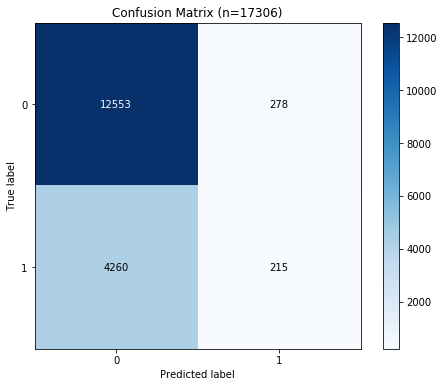

In [31]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, 
                                    figsize=(8,6),
                                    title=f'Confusion Matrix (n={len(y_test)})',
                                    normalize=False);

In [0]:
# Predicted probabilities for positive class
y_pred_proba2 = model.predict_proba(X_test_processed)[:, 1] # Probability for positive class

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)

In [34]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.97
1,0.000000,0.000223,0.97
2,0.000000,0.000447,0.94
3,0.000078,0.000447,0.90
4,0.000078,0.000894,0.88
...,...,...,...
87,0.656223,0.777430,0.04
88,0.723950,0.837318,0.03
89,0.801185,0.894972,0.02
90,0.897592,0.955084,0.01


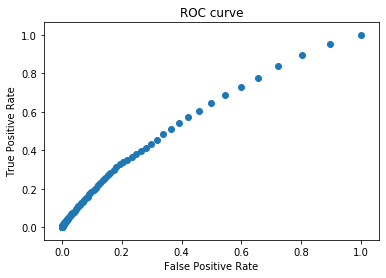

In [35]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [36]:
# Use scikit-learn to calculate the area under the curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba2)

0.606076388843535

In [0]:
#ROC-AUC score = 60.6% for the target positive class 'Failed inspection'

In [37]:
#Permutation Importance Plot
pip install eli5

In [38]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_test_processed, y_test)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [39]:
permuter.feature_importances_

array([ 0.00223044,  0.00011557, -0.00174506,  0.00245002,  0.00049694,
       -0.00220733,  0.00298162,  0.0002658 , -0.00105166, -0.00302785,
       -0.0003467 ])

In [40]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)
#Permutation Importance Plot

Weight,Feature
0.0030 ± 0.0014,Inspection Type
0.0025 ± 0.0012,Facility Type
0.0022 ± 0.0010,Inspection ID
0.0005 ± 0.0007,Risk
0.0003 ± 0.0002,Violations
0.0001 ± 0.0008,AKA Name
-0.0003 ± 0.0010,Location
-0.0011 ± 0.0008,Latitude
-0.0017 ± 0.0010,License #
-0.0022 ± 0.0008,Zip


### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._